In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import textacy
import random
import modules.clean_script
import modules.lines_to_txt
import os

from modules.clean_script import clean_script
from modules.lines_to_txt import lines_to_txt
from modules.sentiment_analysis import sentiment_analysis, polarity, strongest_lines
from os import path
from wordcloud import WordCloud, STOPWORDS

# force reload of custom modules
import importlib
importlib.reload(modules.clean_script);
importlib.reload(modules.lines_to_txt);
importlib.reload(modules.sentiment_analysis);

In [2]:
DATA_PATH = "data/lotr_dataset.csv"

script_df = pd.read_csv("data/lotr_scripts.csv")
char_df = pd.read_csv("data/lotr_characters.csv")

# Clean script from modules/clean_script.py
lotr_df, script_df, char_df = clean_script(script_df, char_df, out_path=DATA_PATH)

script.csv cleaned and saved to data/lotr_dataset.csv


In [3]:
def show_dialog(script, index=None, after=0):

    if index is None:
        random.randint(0, len(script))

    for i in range(after):
        char=script.iloc[index+i]["char"].upper()
        line=script.iloc[index+i]["dialog"]
        print(f"{char}:")
        print(f"{line}")

# show dialog:
show_dialog(lotr_df, random.randint(0, len(lotr_df)), 3)

ROSIE:
Goodnight lads.
SAM:
Oh alright, but we don't have that much left. We have to be careful or we are going to run out. You go ahead and eat that Mr Frodo. I've rationed it, there should be enough.
FRODO:
For what?


In [4]:
lines_per_char = lotr_df.char.value_counts().to_dict();
lines_per_race = lotr_df.race.value_counts().to_dict();
lines_per_gender = lotr_df.gender.value_counts().to_dict();

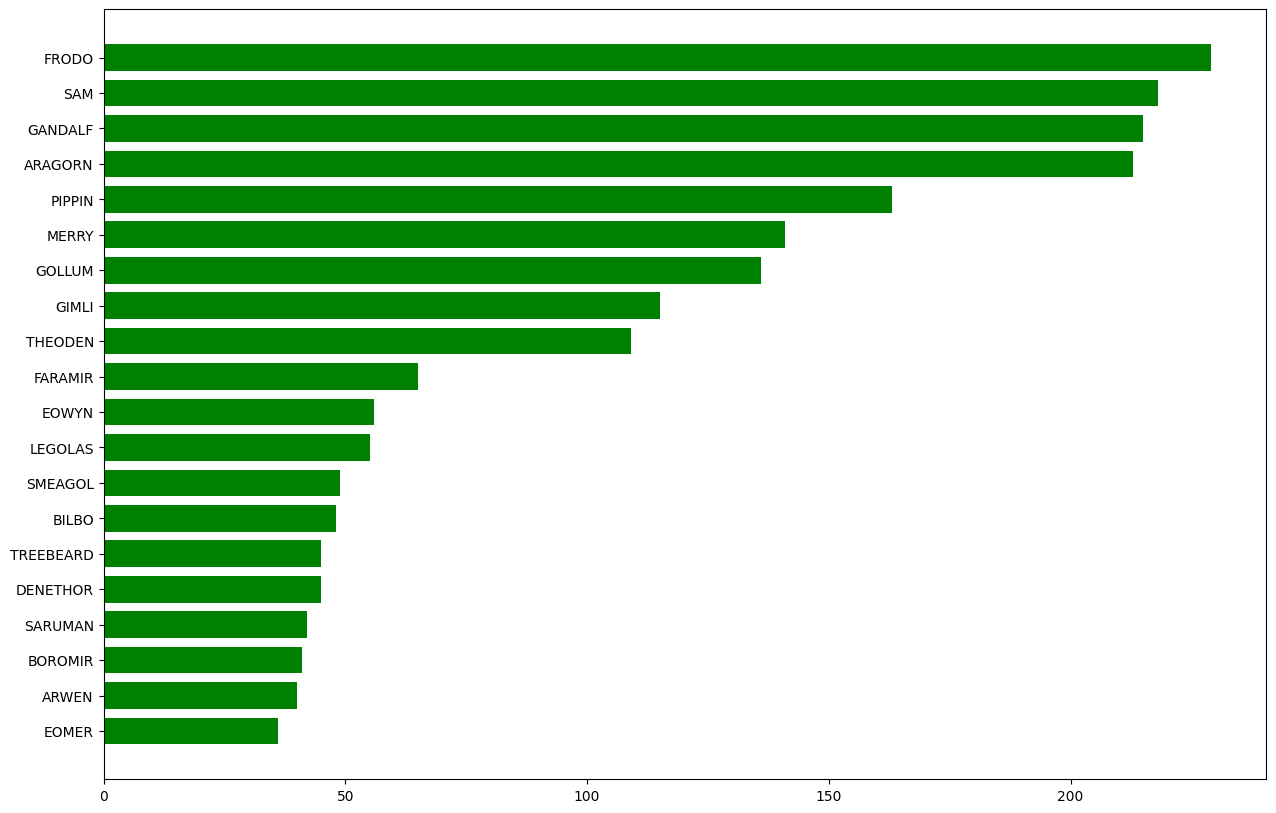

In [5]:
plt.figure(figsize=(15, 10));
plt.barh(range(len(lines_per_char))[:20], sorted(list(lines_per_char.values()), reverse=True)[:20][::-1], height=0.75, align='center', color='green');
plt.yticks(range(len(lines_per_char))[:20], list(lines_per_char.keys())[:20][::-1]);

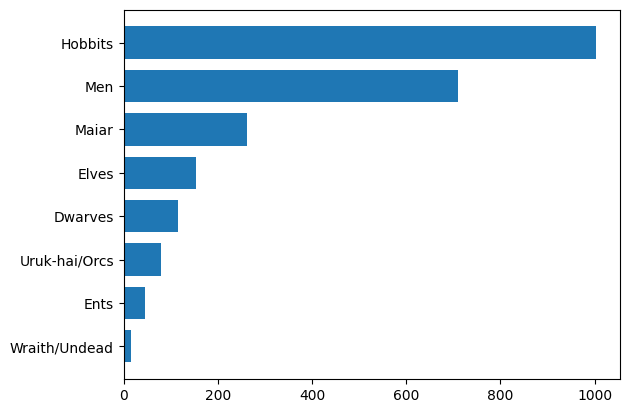

In [6]:
plt.barh(range(len(lines_per_race)), sorted(list(lines_per_race.values()), reverse=False), height=0.75, align='center');
plt.yticks(range(len(lines_per_race)), list(lines_per_race.keys())[::-1]);

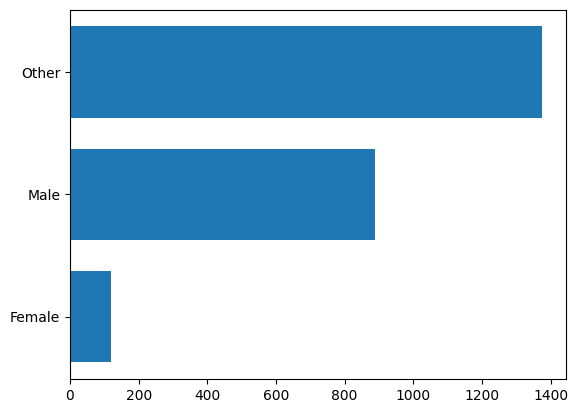

In [7]:
plt.barh(range(len(lines_per_gender))[:20], sorted(list(lines_per_gender.values())[:20], reverse=False), height=0.75, align='center');
plt.yticks(range(len(lines_per_gender)), list(lines_per_gender.keys())[::-1]);

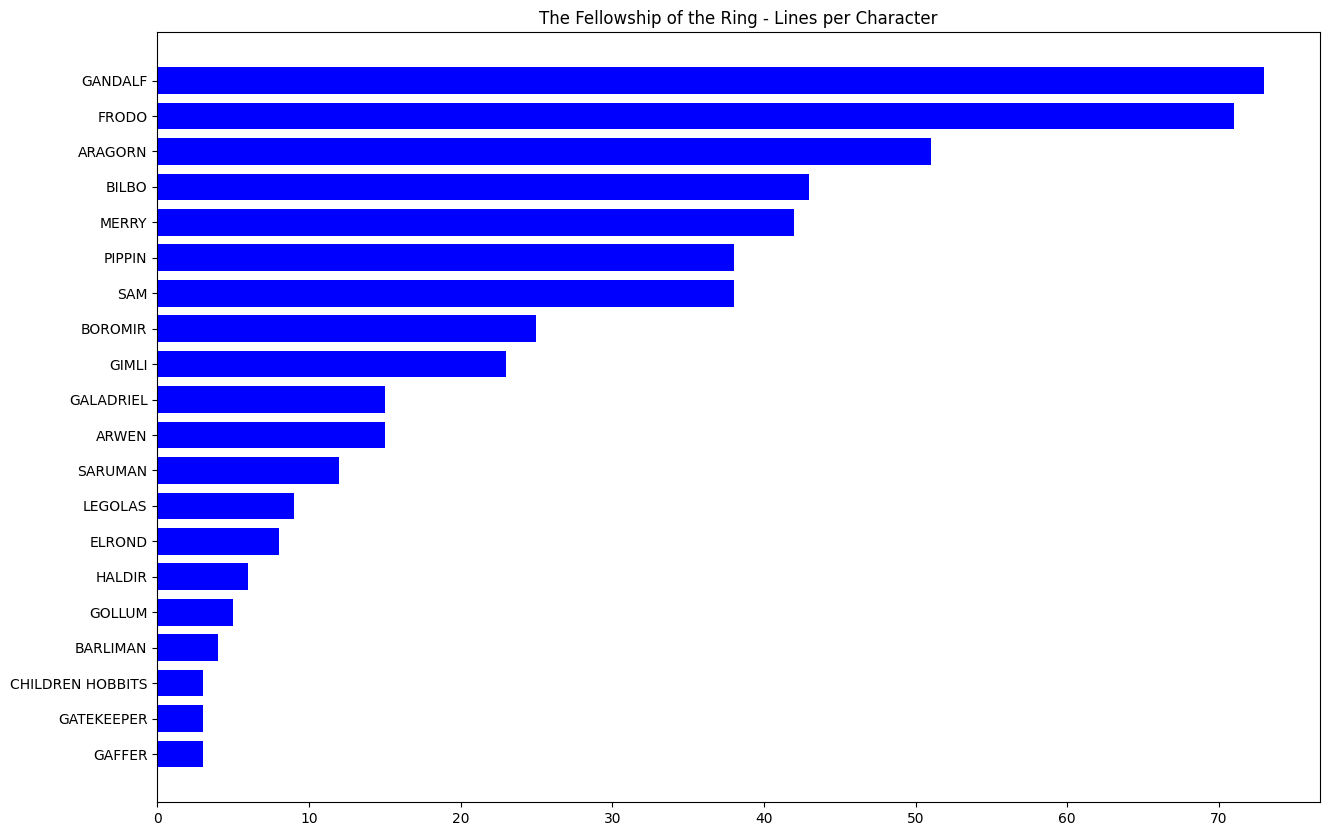

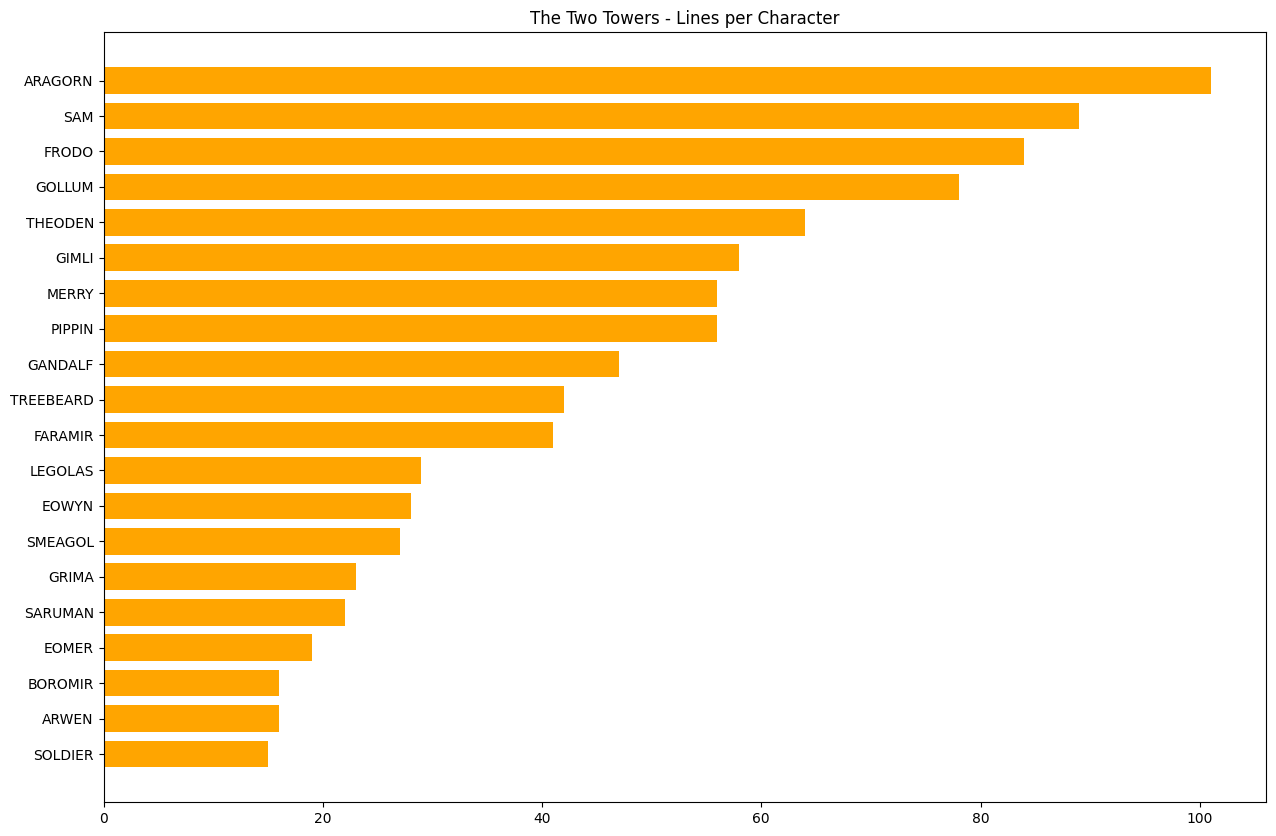

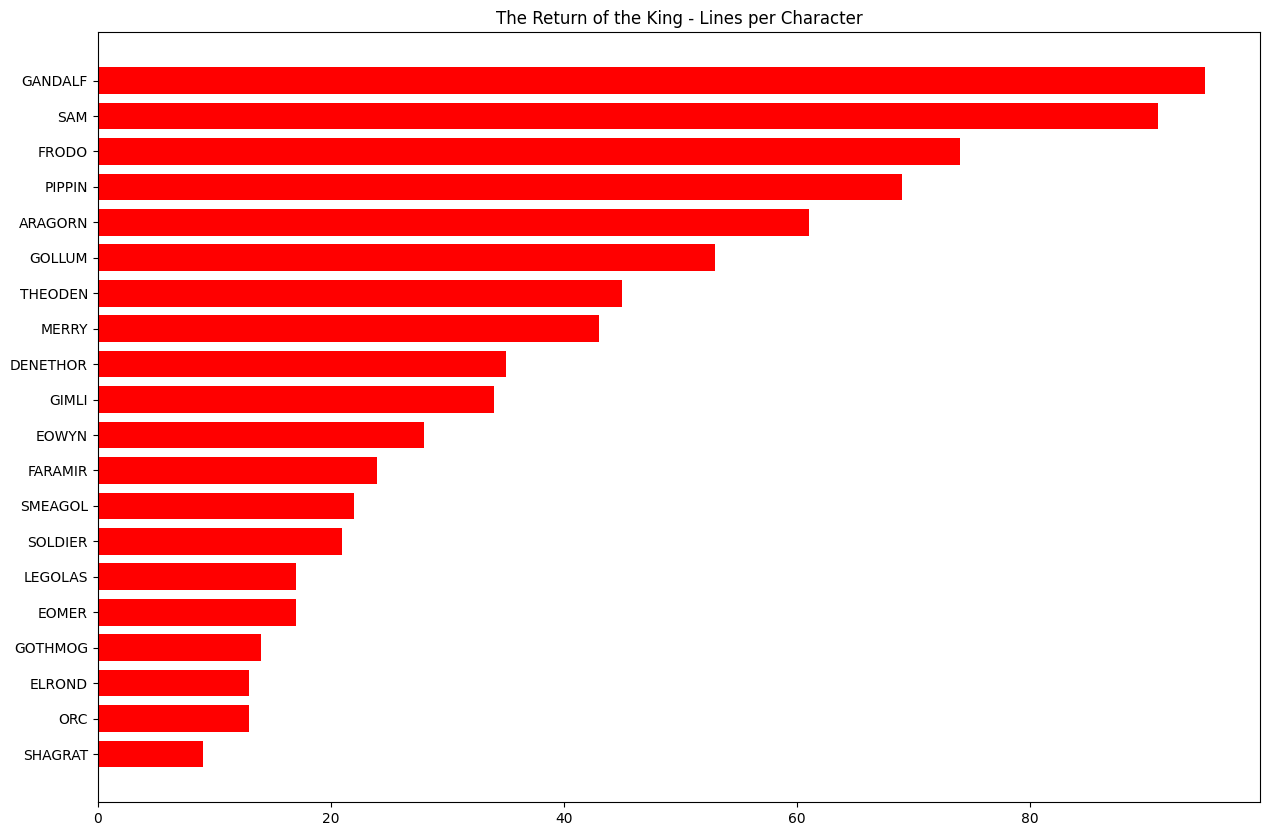

In [8]:
lines_char_FOTR = lotr_df.loc[lotr_df["movie"]=="The Fellowship of the Ring "].char.value_counts().to_dict();
lines_char_TTT = lotr_df.loc[lotr_df["movie"]=="The Two Towers "].char.value_counts().to_dict();
lines_char_ROTK = lotr_df.loc[lotr_df["movie"]=="The Return of the King "].char.value_counts().to_dict();

plt.figure(figsize=(15, 10));
plt.barh(range(len(lines_char_FOTR))[:20], sorted(list(lines_char_FOTR.values())[:20], reverse=False), height=0.75, align='center', color='blue');
plt.yticks(range(len(lines_char_FOTR))[:20], list(lines_char_FOTR.keys())[:20][::-1]);
plt.title("The Fellowship of the Ring - Lines per Character");

plt.figure(figsize=(15, 10));
plt.barh(range(len(lines_char_TTT))[:20], sorted(list(lines_char_TTT.values())[:20], reverse=False), height=0.75, align='center', color='orange');
plt.yticks(range(len(lines_char_TTT))[:20], list(lines_char_TTT.keys())[:20][::-1]);
plt.title("The Two Towers - Lines per Character");

plt.figure(figsize=(15, 10));
plt.barh(range(len(lines_char_ROTK))[:20], sorted(list(lines_char_ROTK.values())[:20], reverse=False), height=0.75, align='center', color='red');
plt.yticks(range(len(lines_char_ROTK))[:20], list(lines_char_ROTK.keys())[:20][::-1]);
plt.title("The Return of the King - Lines per Character");


In [9]:
#lines_to_txt(DATA_PATH);
lines_to_txt(DATA_PATH);
lines_to_txt(DATA_PATH, None, None, None, True);

Lines written to data/lotr_lines.txt
Lines written to data/lotr_lines_nochar.txt


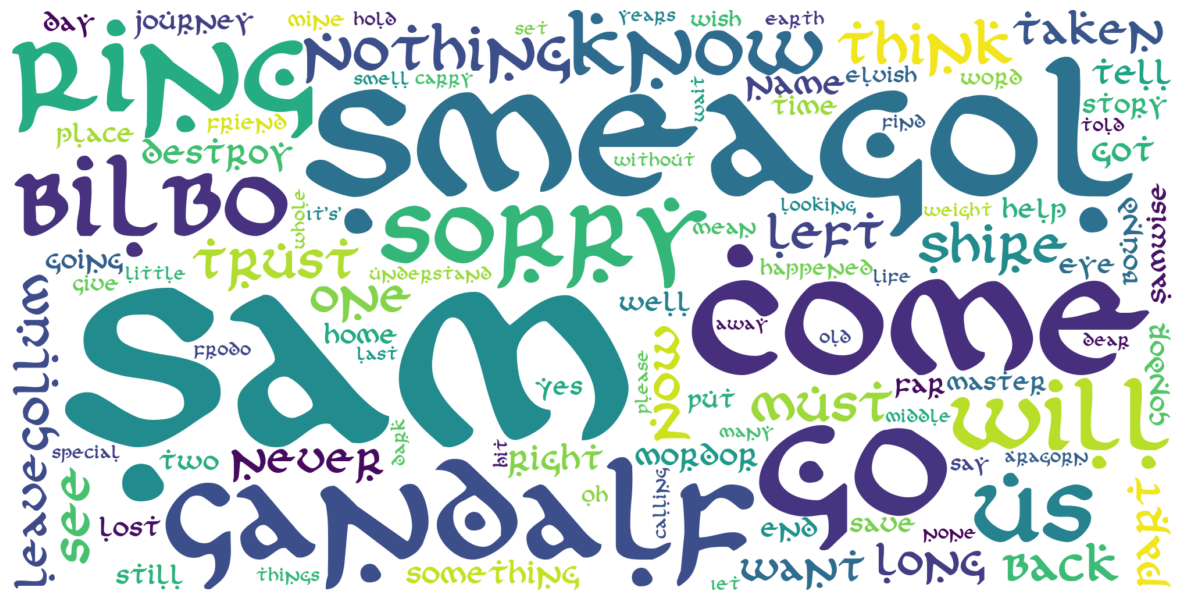

In [10]:
with open("data/frodo_lines.txt", "r") as f:
    text = f.read()

stopwords = set(STOPWORDS);
wc = WordCloud(max_words=100, stopwords=stopwords, font_path='first-order.ttf',
               background_color="white", width=2000, height=1000);

# generate word cloud
wc.generate(text);

# show
plt.figure(figsize=(15, 10));
plt.imshow(wc, interpolation='bilinear');
plt.axis("off");

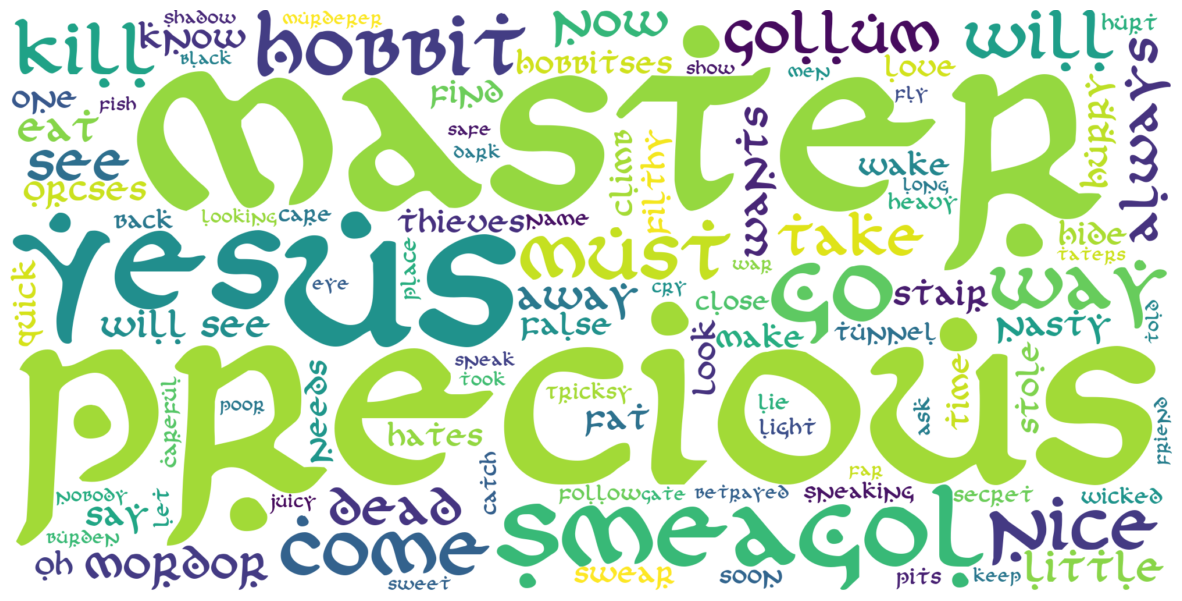

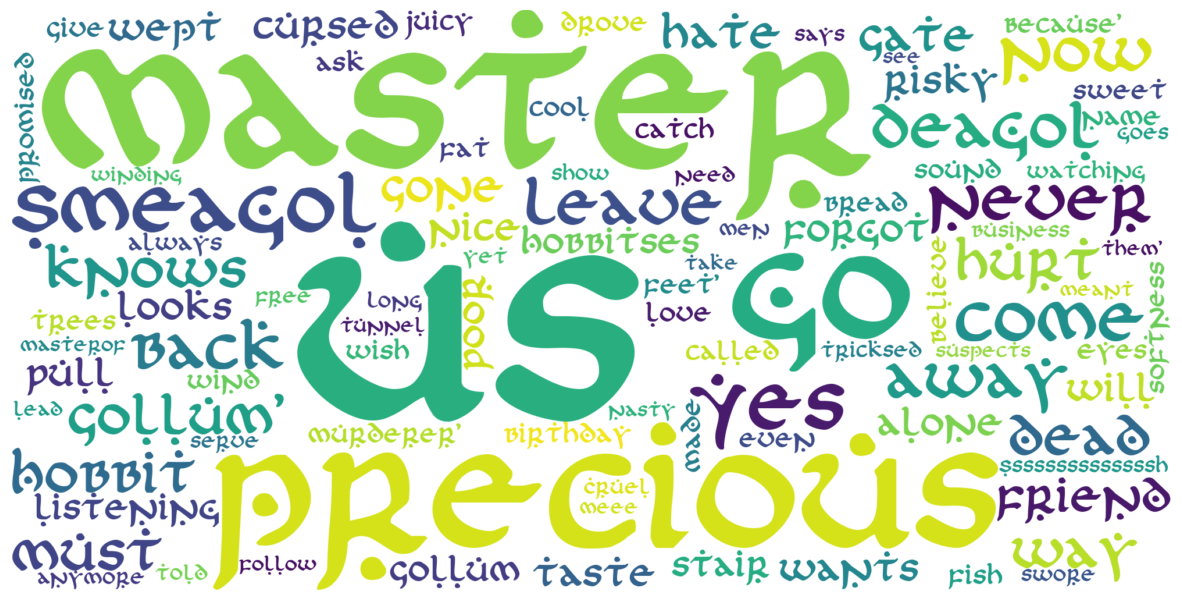

In [11]:
with open("data/gollum_lines.txt", "r") as f:
    text1 = f.read()

with open("data/smeagol_lines.txt", "r") as f:
    text2 = f.read()

stopwords = set(STOPWORDS);
wc1 = WordCloud(max_words=100, stopwords=stopwords, font_path='first-order.ttf',
               background_color="white", width=2000, height=1000);
wc2 = WordCloud(max_words=100, stopwords=stopwords, font_path='first-order.ttf',
               background_color="white", width=2000, height=1000);

# generate word cloud
wc1.generate(text1);
wc2.generate(text2);

# show
plt.figure(figsize=(15, 10));
plt.imshow(wc1, interpolation='bilinear');
plt.axis("off");

plt.figure(figsize=(15, 10));
plt.imshow(wc2, interpolation='bilinear');
plt.axis("off");

In [12]:
with open("data/lotr_lines_nochar.txt", "r") as f:
    text = f.read()
nlp = spacy.load("en_core_web_md");
lotr_doc = nlp(text);

In [13]:
bi_grams = textacy.extract.basics.ngrams(lotr_doc, 2)
bi_grams = [str(x).lower() for x in bi_grams]
bi_grams = [x.replace("(", "").replace(")", "").replace(",", "").replace(".", "") for x in bi_grams]
bi_grams_freq = sorted({x:bi_grams.count(x) for x in bi_grams}.items(), key=lambda x: x[1], reverse=True)

print(bi_grams_freq[:10])

tri_grams = textacy.extract.basics.ngrams(lotr_doc, 3)
tri_grams = [str(x).lower() for x in tri_grams]
tri_grams = [x.replace("(", "").replace(")", "").replace(",", "").replace(".", "") for x in tri_grams]
tri_grams_freq = sorted({x:tri_grams.count(x) for x in tri_grams}.items(), key=lambda x: x[1], reverse=True)

print(tri_grams_freq[:10])



[('mr frodo', 52), ('minas tirith', 16), ('middle earth', 12), ('peregrin took', 9), ('frodo baggins', 7), ('theoden king', 7), ('heh heh', 7), ('bilbo baggins', 6), ('mount doom', 6), ('hmm hmm', 6)]
[("helm's deep", 10), ('women and children', 6), ('shall have peace', 4), ('world of men', 4), ('armies of mordor', 4), ("isildur's heir", 4), ('king of gondor', 4), ('way is shut', 4), ('ring of power', 4), ('han mathon ne', 4)]


In [14]:
with open("data/lotr_lines_nochar.txt", "r") as f:
    text = f.read()
#print(sentiment_analysis(text))
#print(polarity(text))
#print(strongest_lines(text))
print(strongest_lines(text, 5, 'anger'))

[[0.9980841875076294, [{'label': 'anger', 'score': 0.9980841875076294}, {'label': 'fear', 'score': 0.0006654202006757259}, {'label': 'sadness', 'score': 0.0005373510648496449}, {'label': 'joy', 'score': 0.0003010890504810959}, {'label': 'love', 'score': 0.00022924112272448838}, {'label': 'surprise', 'score': 0.00018260962679050863}], "This new Gandalf's more grumpythan the old one."], [0.997941792011261, [{'label': 'anger', 'score': 0.997941792011261}, {'label': 'fear', 'score': 0.0007995541673153639}, {'label': 'sadness', 'score': 0.0005576889961957932}, {'label': 'joy', 'score': 0.00030086899641901255}, {'label': 'love', 'score': 0.00022097905457485467}, {'label': 'surprise', 'score': 0.0001791241520550102}], "That horse is half mad, my lord. There's nothing you can do. Leave him."], [0.9977558255195618, [{'label': 'anger', 'score': 0.9977558255195618}, {'label': 'fear', 'score': 0.0008142756996676326}, {'label': 'sadness', 'score': 0.0006018703570589423}, {'label': 'joy', 'score': 0

In [15]:
with open("data/gollum_lines.txt", "r") as f:
    gollum = f.read()
print(sentiment_analysis(gollum))
print(polarity(gollum))

{'anger': 0.4542398605478484, 'fear': 0.10076046628606876, 'sadness': 0.07189784018428194, 'joy': 0.3373739410743685, 'love': 0.0324447430035288, 'surprise': 0.0032831459745074737}
{'LABEL_0': 0.34187860152663757, 'LABEL_1': 0.49059929407752345, 'LABEL_2': 0.1675221019659878}


In [16]:
with open("data/smeagol_lines.txt", "r") as f:
    smeagol = f.read()
print(sentiment_analysis(smeagol))
print(polarity(smeagol))

{'anger': 0.4610841268408694, 'joy': 0.3267814195988467, 'fear': 0.08476238775518141, 'sadness': 0.10309335409896449, 'surprise': 0.0033510416257195173, 'love': 0.02092767503054347}
{'LABEL_1': 0.38141979125794023, 'LABEL_2': 0.17954436959000306, 'LABEL_0': 0.4390358417807147}


Plot over images

Most common trigrams per char

Most common bigrams per char

Sentiment Analysis for movie

Transformer Race Text Classifier Model - using also the hobbit

LOTRGPT - bare model and from finetuned LLM